In [1]:
import pandas as pd

df_users = pd.read_csv('takehome_users.csv', encoding='latin1')
df_engage = pd.read_csv('takehome_user_engagement.csv')

In [2]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
8823/12000


0.73525

In [5]:
df_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
df_engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
df_engage['time_stamp'] = pd.to_datetime(df_engage['time_stamp']).dt.date.values

df = df_engage.groupby(['time_stamp','user_id']).sum().unstack().fillna(0)
df.columns = df.columns.droplevel()
df.head()

user_id,1,2,3,4,5,6,7,10,11,13,...,11989,11990,11991,11992,11995,11996,11997,11998,11999,12000
time_stamp,,,,,,,,,,,,,,,,,,,,,
2012-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-06-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df1 = df[:6].cumsum()      #upfront stub
df2 = df.rolling(7).sum()  #after rolling nans

df = pd.concat([df1, df2.iloc[6:,:]], axis=0)
s_engaged =  df.apply(max , axis=0)
s_engaged = s_engaged.apply(lambda x: 1 if x>=3 else 0)

df_target = pd.DataFrame(s_engaged, columns=['adopted'])
df_target = df_target.reset_index()
df_target.columns = ['object_id', 'adopted']

df_target

,object_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
...,...,...
8818,11996,0
8819,11997,0
8820,11998,0
8821,11999,0


In [9]:
df_target['adopted'].value_counts(normalize=True)

0    0.818429
1    0.181571
Name: adopted, dtype: float64

We highlight that this data is fairly imbalanced and we will want to keep this in mind when running the predictive models.

Instead of discarding creation time and email, we will extract information from these variables that might be useful as features. For the email address, we will extract the email domain. The creationd ate is trickier but periodic features like varibales like clenfar months, quarters or seasons could be useful. This should be informed by the business and product type but without any further information, we will use calendar quarters. 

Invited by user id could be another interesting feature as if "star recruiters" emerge then we could build business strategies to incentivize these people. Additionally, should we be able to identify a profile for these star recruiters then we could look to attract and incentivize such people (new joiners) or profiles (already member sbut actively recruiting). This is identified as future work and for the moment, we just keep this column as is.

We mark the last session creation time as a suspect variable as we do not know how representative this is of the users typical login time or even fi there is a pattern. While we could verufy this by wrangling the engagement data further, for the purpose of the current exercise, we will keep this column and discretize it in 3 hour bins form midnight. If it turns out to be an important feature, we could investigate further.

We will also discard user id and name


Onto implementation. We will start by discretizing the discussed variables into categories:

In [10]:
#email to email domain
df_users['email'] = df_users['email'].apply(lambda x: 
                                            x[x.find('@')+1 : x.find('.com')])
#creation_time to calendar quarter (1 through 4)
df_users['creation_time'] = pd.to_datetime(df_users['creation_time']).dt.month // 3.01 +1

#last session creation time to 6 hour bins (1 through 4)
df_users['last_session_creation_time'] = pd.to_datetime(df_users['last_session_creation_time'], unit='s').dt.hour // 6.01 +1


In [11]:
#inspect nomrlaized value counts for emails
df_users['email'].value_counts(normalize=True).head(10)

gmail         0.296833
yahoo         0.203917
jourrapide    0.104917
cuvox.d       0.100167
gustr         0.098250
hotmail       0.097083
oqpze         0.000167
xvnbr         0.000167
dqwln         0.000167
xybhi         0.000167
Name: email, dtype: float64

In [12]:
#set all but the top 6 to not_main
main_list = df_users['email'].value_counts(normalize=True).index.tolist()[:6]
df_users['email'] = df_users['email'].apply(lambda x: x if x in main_list else 'not_main')

*some domains such as jourrapide, cuvox.d, gustr could be correlated with organization name

The next step is to covert categorical values to one hot vectors

In [13]:
dummies_email = pd.get_dummies(df_users.email)
dummies_creation = pd.get_dummies(df_users.creation_source)

df_features = df_users.drop(['email', 'creation_source', 'name'], axis=1)
df_features = pd.concat([df_features, dummies_email, dummies_creation], axis=1)   

We will merge feature and target 

In [14]:
df_yX = df_target.merge(df_features, how='inner', on = 'object_id')

In [15]:
df_yX

,object_id,adopted,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,cuvox.d,gmail,gustr,hotmail,jourrapide,not_main,yahoo,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,1,0,2.0,1.0,1,0,11,10803.0,0,0,0,0,0,0,1,1,0,0,0,0
1,2,1,4.0,1.0,0,0,1,316.0,0,0,1,0,0,0,0,0,1,0,0,0
2,3,0,1.0,4.0,0,0,94,1525.0,0,0,1,0,0,0,0,0,1,0,0,0
3,4,0,2.0,2.0,0,0,1,5151.0,0,0,0,0,0,0,1,1,0,0,0,0
4,5,0,1.0,2.0,0,0,193,5240.0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8818,11996,0,3.0,1.0,0,0,89,8263.0,0,0,1,0,0,0,0,0,1,0,0,0
8819,11997,0,1.0,3.0,0,0,200,NaN,0,1,0,0,0,0,0,0,0,0,0,1
8820,11998,0,2.0,2.0,1,1,83,8074.0,1,0,0,0,0,0,0,1,0,0,0,0
8821,11999,0,2.0,2.0,0,0,6,NaN,0,0,0,0,0,1,0,0,0,1,0,0


We know there are NaNs in last session creation time and invited by user id. Imputation could be risky for this dataset and so we will get rid of all nans

In [16]:
df_yX_no_nan = df_yX.dropna()

In [24]:
print(df_yX_no_nan.shape)

X_nn = df_yX_no_nan.loc[:, 'creation_time':]
y_nn = df_yX_no_nan['adopted']

(4776, 20)


In [18]:
y_nn.value_counts()

0    3863
1     913
Name: adopted, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

logreg1 = LogisticRegression(class_weight='balanced', random_state=42)
logreg1.fit(X_train_nn, y_train_nn)
y_pred_nn1 = logreg1.predict(X_test_nn)
cm = confusion_matrix(y_test_nn, y_pred_nn1)
df_cm = pd.DataFrame(cm, index= ['not adopted', 'adopted'],columns=['not adopted', 'adopted'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm


Predicted,not adopted,adopted
Actual,,
not adopted,429,333
adopted,99,95


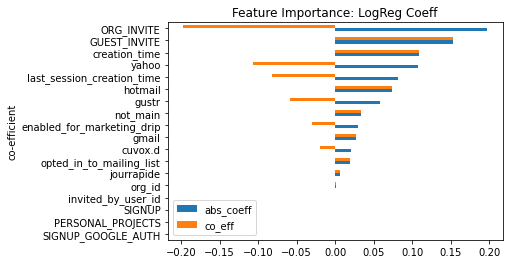

In [20]:
import numpy as np

co_eff1 = logreg1.coef_
abs_vec = np.vectorize(abs)
abs_co_eff1 = abs_vec(co_eff1[0])
idx1 = np.argsort(abs_co_eff1)[-20:]

df_results1 = pd.DataFrame(zip(X_nn.columns[idx1], abs_co_eff1[idx1], co_eff1[0][idx1]), columns=['Feature', 'abs_coeff', 'co_eff'])
df_results1 = df_results1.set_index('Feature', drop=True)
df_results1 = df_results1.sort_values('abs_coeff', ascending=True).plot(kind='barh', title='Feature Importance: LogReg Coeff',
                                                                       xlabel='co-efficient')

In [21]:
from sklearn.ensemble import RandomForestClassifier

randfor1 = RandomForestClassifier(class_weight='balanced', random_state=42)
randfor1.fit(X_train_nn, y_train_nn)
y_pred_nn1 = randfor1.predict(X_test_nn)
cm = confusion_matrix(y_test_nn, y_pred_nn1)
cm


array([[742,  20],
       [191,   3]], dtype=int64)

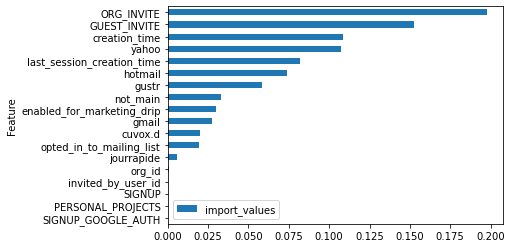

In [22]:
import_values = randfor1.feature_importances_
idx1 = np.argsort(import_values)[-20:]

df_results1 = pd.DataFrame(zip(X_nn.columns[idx1], abs_co_eff1[idx1]), columns=['Feature', 'import_values'])
df_results1 = df_results1.set_index('Feature', drop=True)
df_results1 = df_results1.sort_values('import_values', ascending=True).plot(kind='barh')